In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pylab as plt

from models.vae import VAE

In [2]:
batch_size = 32
test_batch_size = 32

lr = 1e-4

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train = True,download = True,
                 transform = transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Normalize(mean = (0.5,), std = (0.5,))
                 ])),
    batch_size = batch_size,
    shuffle = True)

In [4]:
model =  VAE(n_channel=1)
model_opt = torch.optim.Adam(params=model.parameters(), lr=lr)


In [5]:
for i in range(20):
    for feature, label in iter(train_loader):
        x = model.encode(feature)
        mu, log_var, z = model.sample(x)
        x_recon = model.decode(z)

        kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - torch.exp(log_var))
        recon_loss = nn.MSELoss(reduction='sum')(x_recon.view(batch_size, -1), feature.view(batch_size, -1))

        loss = kl_loss + recon_loss
        model_opt.zero_grad()
        loss.backward()
        model_opt.step()
    print(f"{i}: {loss.item()}")



0: 5374.41796875
1: 4080.80419921875
2: 3822.25048828125
3: 3599.5029296875
4: 3536.8955078125
5: 3200.6162109375
6: 3140.80712890625
7: 2327.824462890625
8: 2384.63037109375
9: 2161.814453125
10: 2294.5830078125
11: 2221.38330078125
12: 2201.575927734375
13: 2127.8544921875
14: 2286.68994140625
15: 2176.220458984375
16: 2080.8896484375
17: 2169.252685546875
18: 2222.9599609375
19: 2143.2197265625


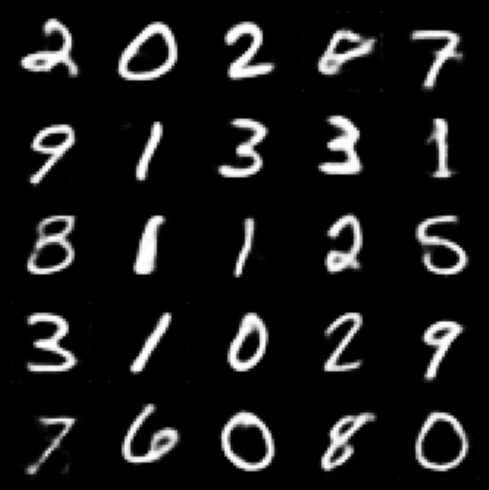

In [6]:
plt.figure(figsize=(5, 5)).set_facecolor('black')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_recon[i][0].detach().numpy(), cmap = plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()